In [1]:
import numpy as np
import json
import pycpd
from matplotlib import pyplot as plt

In [2]:
with open('Annotationen/Annotation-D.json') as f:
    data = json.load(f)

# für Schnitte C und D sind die json Dateien richtig (Regionsbenennung 'name'='Other')
# TODO E, F, G, H Json richtig darstellen
    
for item in data:
    if 'classification' in item['properties']:
        if item['properties']['classification']['name'] == 'Other':
            annotation_c_list = []
            for sublist in item['geometry']['coordinates']:
                for sublist2 in sublist:
                    for point in sublist2:
                        annotation_c_list.append(point)
            annotation_c = np.array(annotation_c_list)
            
            

In [15]:
print(annotation_c)

[[45826.32  1247.17]
 [45275.25  1276.18]
 [44869.19  1334.18]
 ...
 [44047.   57156.  ]
 [44046.   57157.  ]
 [44046.   57157.92]]


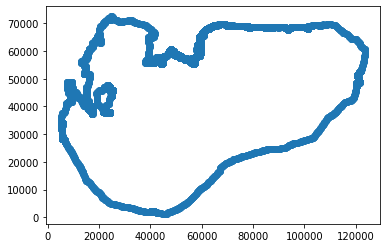

In [13]:
x_anno = annotation_c[:,0]
y_anno = annotation_c[:,1]
plt.scatter(x_anno,y_anno)

In [5]:
x_cut = []
y_cut = []
l = []

with open('Annotationen/Schnitt-D.obj') as obj:
    readlines = obj.readlines()
    
for line in readlines:
    if line.startswith('l '):
        lines = line.split(' ')
        if lines[1] not in l:
            l.append(int(lines[1]))
        if lines[2] not in l:
            l.append(int(lines[2]))
            
for index in l:
    splitted = readlines[index].split(' ')
    x_cut.append(float(splitted[3])-1)
    y_cut.append(float(splitted[1])-1)
    
        

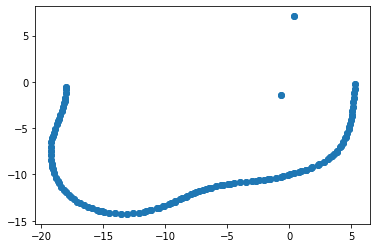

In [6]:
plt.scatter(x_cut, y_cut)

In [7]:
# Vorregestrierung

# https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421
# *gemeinsamen Nullpunkt finden
# *Abstände zum Nullpunkt normalisieren

# *Upsampling - # Interpolation für mehr Punkte

In [8]:
# Point Drift Registrierung

In [9]:
# Für Datei D, Rotation und Ausrichtung richtig. Für andere Dateien problematisch, Lösung suchen

In [10]:
# Programm bereinigen, Abgabefertig machen